1. import different libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, kstest, shapiro

2. read csv file

In [4]:
df = pd.read_csv('SDOT_Collisions.csv')

/var/folders/nn/lc5n9zn964zcgsw9v2_vpjvw0000gn/T/ipykernel_11264/2532032247.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SDOT_Collisions.csv')


3. Load the data into a pandas dataframe and conduct basic operations using methods like head(), tail(), columns, info(), and describe().

In [5]:
df.head()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
0,5955724,System.Byte[],359371,360851,3900360,Matched,Intersection,29504.0,DENNY WAY AND FAIRVIEW AVE,NaN,...,N,2023-29740,PTCR,Police Traffic Collision Report,RAUSCHE,3/7/2023 12:00:00 AM,STATE INTERFACE,7/5/2023 12:00:00 AM,1.270271e+06,229225.914015
1,5955725,System.Byte[],362680,364160,3904129,Matched,Block,NaN,RAINIER AVE S BETWEEN S HOLLY ST AND S WILLOW ST,NaN,...,N,2023-123898,PTCR,Police Traffic Collision Report,RAUSCHE,6/20/2023 12:00:00 AM,STATE INTERFACE,10/30/2023 12:00:00 AM,1.285051e+06,200876.389506
2,5955726,System.Byte[],365797,367277,ED63058,Matched,Block,NaN,2ND AVE BETWEEN UNION ST AND PIKE ST,NaN,...,N,2023-103183,PTCR,Police Traffic Collision Report,JOHNSOS1,10/4/2023 12:00:00 AM,ZUNIGAR1,4/11/2024 12:00:00 AM,1.269167e+06,225698.129179
3,5955727,System.Byte[],366458,367938,EE05029,Matched,Intersection,28884.0,2ND AVE N AND ROY ST,NaN,...,N,2023-285263,PTCR,Police Traffic Collision Report,WADEC,10/26/2023 12:00:00 AM,STATE INTERFACE,2/7/2024 12:00:00 AM,1.265752e+06,231841.191585
4,5955728,System.Byte[],366244,367724,EE06457,Matched,Intersection,27065.0,11TH AVE NE AND NE 45TH ST,NaN,...,N,2023-287335,PTCR,Police Traffic Collision Report,BRUKTAH,10/19/2023 12:00:00 AM,ZUNIGAR1,3/21/2024 12:00:00 AM,1.274930e+06,244741.222831


In [6]:
df.shape

(248294, 50)

In [7]:
df.columns

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added by User',
       'Added date', 'Modified by', 'Modified date', 'x', 'y'],
      dtype='object')

In [8]:
df["HITPARKEDCAR"].isnull().sum()

0

In [9]:
df["HITPARKEDCAR"].head()

0    N
1    N
2    N
3    N
4    N
Name: HITPARKEDCAR, dtype: object

In [10]:
df['HITPARKEDCAR'].nunique()

2

In [11]:
df['HITPARKEDCAR'].value_counts()

HITPARKEDCAR
N    230764
Y     17530
Name: count, dtype: int64

In [12]:
df["SPEEDING"].isnull().sum()

237084

In [13]:
'''after resding SOTD data it is clear that empty SPEADING column means 
   vehicle not speading so we fiil column with N.

'''
df["SPEEDING"] = df["SPEEDING"].fillna("N")

In [14]:
df["SPEEDING"].head()

0    N
1    N
2    Y
3    N
4    N
Name: SPEEDING, dtype: object

In [15]:
df.tail()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
248289,6204013,System.Byte[],369096,370576,EE37823,Unmatched,Intersection,29622.0,1ST AVE AND MARION ST,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,JOHNSOS1,1/26/2024 12:00:00 AM,JOHNSOS1,1/26/2024 12:00:00 AM,1.269839e+06,223931.451289
248290,6204014,System.Byte[],366728,368208,EE09629,Unmatched,Block,NaN,WALLINGFORD AVE N BETWEEN N 80TH ST AND N 82ND ST,NEI,...,Y,NaN,CVCR,Citizen Vehicle Collision Report,WADEC,11/2/2023 12:00:00 AM,WADEC,11/2/2023 12:00:00 AM,1.270232e+06,254507.958265
248291,6204015,System.Byte[],369171,370651,3922716,Unmatched,Intersection,29863.0,MELROSE AVE AND PINE ST,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,WADEC,1/30/2024 12:00:00 AM,WADEC,1/30/2024 12:00:00 AM,1.271814e+06,227999.639454
248292,6204016,System.Byte[],367345,368825,3914629,Unmatched,Block,NaN,WESTLAKE AVE N BETWEEN HIGHLAND DR AND GALER S ST,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,RAUSCHE,11/17/2023 12:00:00 AM,RAUSCHE,11/17/2023 12:00:00 AM,1.268698e+06,233807.774435
248293,6204017,System.Byte[],368476,369956,3906699,Unmatched,Block,NaN,1ST AVE S BETWEEN 2ND AV SW ON RP AND SW KENYO...,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,JOHNSOS1,1/8/2024 12:00:00 AM,JOHNSOS1,1/8/2024 12:00:00 AM,1.269333e+06,198039.613119


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248294 entries, 0 to 248293
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   OBJECTID                        248294 non-null  int64  
 1   SE_ANNO_CAD_DATA                248294 non-null  object 
 2   INCKEY                          248294 non-null  int64  
 3   COLDETKEY                       248294 non-null  int64  
 4   REPORTNO                        248294 non-null  object 
 5   STATUS                          248294 non-null  object 
 6   ADDRTYPE                        244359 non-null  object 
 7   INTKEY                          82824 non-null   float64
 8   LOCATION                        243421 non-null  object 
 9   EXCEPTRSNCODE                   12790 non-null   object 
 10  EXCEPTRSNDESC                   12790 non-null   object 
 11  SEVERITYCODE                    248293 non-null  object 
 12  SEVERITYDESC    

In [17]:
df.describe()

,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,STCOLCODE,SEGLANEKEY,CROSSWALKKEY,x,y
count,2.482940e+05,248294.000000,248294.000000,82824.000000,248294.000000,248294.000000,248294.000000,248294.000000,248294.000000,248294.000000,248294.000000,248293.000000,1.272050e+05,214640.000000,248294.000000,2.482940e+05,2.402080e+05,240208.000000
mean,6.079870e+06,167160.624365,167524.882836,38205.640913,2.237150,0.038885,0.027814,1.695716,0.374379,0.016783,0.001949,13.523249,7.971063e+06,22.687658,240.941452,8.740520e+03,1.271162e+06,229670.948644
std,7.167645e+04,106037.254473,106554.937782,54469.905194,1.442178,0.203710,0.165902,0.862019,0.726427,0.161488,0.047366,7.532303,2.611523e+06,14.672936,3105.837048,6.831474e+04,7.374077e+03,20613.948178
min,5.955724e+06,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000,0.000000e+00,1.248139e+06,184059.089009
25%,6.017797e+06,78362.250000,78362.250000,28667.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,11.000000,0.000000,0.000000e+00,1.266694e+06,213565.004431
50%,6.079870e+06,140828.500000,140828.500000,30102.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,8.033011e+06,15.000000,0.000000,0.000000e+00,1.271147e+06,228173.007774
75%,6.141944e+06,244848.750000,245448.750000,34082.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,32.000000,0.000000,0.000000e+00,1.276044e+06,245903.358960
max,6.204017e+06,371192.000000,372672.000000,858453.000000,93.000000,6.000000,3.000000,15.000000,78.000000,41.000000,5.000000,125.000000,1.307202e+07,88.000000,525241.000000,5.239700e+06,1.293052e+06,271525.414794


In [18]:
df.isnull().sum()

OBJECTID                               0
SE_ANNO_CAD_DATA                       0
INCKEY                                 0
COLDETKEY                              0
REPORTNO                               0
STATUS                                 0
ADDRTYPE                            3935
INTKEY                            165470
LOCATION                            4873
EXCEPTRSNCODE                     235504
EXCEPTRSNDESC                     235504
SEVERITYCODE                           1
SEVERITYDESC                           0
COLLISIONTYPE                      33654
PERSONCOUNT                            0
PEDCOUNT                               0
PEDCYLCOUNT                            0
VEHCOUNT                               0
INJURIES                               0
SERIOUSINJURIES                        0
FATALITIES                             0
INCDATE                                0
INCDTTM                                0
JUNCTIONTYPE                       13004
SDOT_COLCODE    

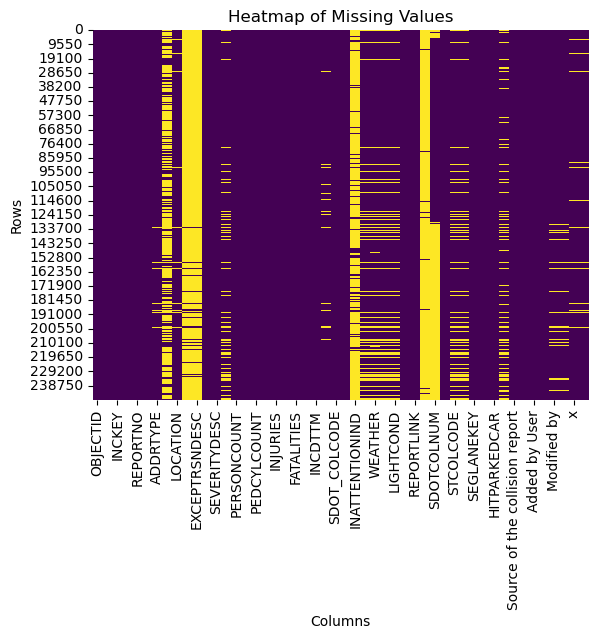

In [19]:
# cheacking the missing values using heat map.

missing_values = df.isnull()
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [20]:
# removing all the duplicated values.
df1= df[~df.duplicated()]

In [21]:
df1.shape

(248294, 50)

In [22]:
df1.isnull().sum()

OBJECTID                               0
SE_ANNO_CAD_DATA                       0
INCKEY                                 0
COLDETKEY                              0
REPORTNO                               0
STATUS                                 0
ADDRTYPE                            3935
INTKEY                            165470
LOCATION                            4873
EXCEPTRSNCODE                     235504
EXCEPTRSNDESC                     235504
SEVERITYCODE                           1
SEVERITYDESC                           0
COLLISIONTYPE                      33654
PERSONCOUNT                            0
PEDCOUNT                               0
PEDCYLCOUNT                            0
VEHCOUNT                               0
INJURIES                               0
SERIOUSINJURIES                        0
FATALITIES                             0
INCDATE                                0
INCDTTM                                0
JUNCTIONTYPE                       13004
SDOT_COLCODE    

# first we collect all the names of the columns.

In [25]:
column_names = df1.columns
print(column_names)

Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'Added by User',
       'Added date', 'Modified by', 'Modified date', 'x', 'y'],
      dtype='object')


In [26]:
# checking for all different numdric and cateforical columns.

numeric_columns = df1.select_dtypes(include='number')
categorical_columns = df1.select_dtypes(include='category')


In [27]:
numeric_columns.columns

Index(['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'SDOT_COLCODE', 'SDOTCOLNUM', 'STCOLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',
       'x', 'y'],
      dtype='object')

In [28]:
# removing some unwanted columns.
columns_to_remove = ["INCKEY", "SE_ANNO_CAD_DATA","REPORTNO", "STATUS","Added by User","Modified by","Added date","Modified date"]

df_cleaned1 = df1.drop(columns=columns_to_remove)

In [29]:
df_cleaned1.shape

(248294, 42)

In [30]:
# Set the threshold for maximum null values allowed in a column
threshold = 0.3 # For example, you can set it to 50% of the total rows

# Calculate the number of null values in each column
null_counts = df_cleaned1.isnull().sum()

# Get the names of columns where the number of null values exceeds the threshold
columns_to_drop = null_counts[null_counts / len(df) > threshold].index

# Drop the columns from the DataFrame
df_cleaned= df_cleaned1.drop(columns=columns_to_drop)

In [31]:
df_cleaned.shape

(248294, 36)

#  Utilize basic query operations, including iloc for selecting single or multiple rows, single or multiple columns, and combinations of rows and columns (using slicing and non-slicing methods)

In [32]:
# Select a single row by index
df_cleaned.iloc[0]

OBJECTID                                                                    5955724
COLDETKEY                                                                    360851
ADDRTYPE                                                               Intersection
LOCATION                                                 DENNY WAY AND FAIRVIEW AVE
SEVERITYCODE                                                                      2
SEVERITYDESC                                                       Injury Collision
COLLISIONTYPE                                                            Rear Ended
PERSONCOUNT                                                                       2
PEDCOUNT                                                                          0
PEDCYLCOUNT                                                                       0
VEHCOUNT                                                                          2
INJURIES                                                                    

In [33]:
# Select multiple rows by index range

df_cleaned.iloc[2:5]  # Select rows 2, 3, 4

,OBJECTID,COLDETKEY,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,STCOLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,x,y
2,5955726,367277,Block,2ND AVE BETWEEN UNION ST AND PIKE ST,2,Injury Collision,Pedestrian,2,1,0,...,2.0,Vehicle turning left hits pedestrian,0,0,N,2023-103183,PTCR,Police Traffic Collision Report,1.269167e+06,225698.129179
3,5955727,367938,Intersection,2ND AVE N AND ROY ST,2,Injury Collision,Pedestrian,4,1,0,...,0.0,Vehicle going straight hits pedestrian,0,0,N,2023-285263,PTCR,Police Traffic Collision Report,1.265752e+06,231841.191585
4,5955728,367724,Intersection,11TH AVE NE AND NE 45TH ST,2b,Serious Injury Collision,Pedestrian,2,1,0,...,4.0,Vehicle hits Pedestrian - All Other Actions,0,0,N,2023-287335,PTCR,Police Traffic Collision Report,1.274930e+06,244741.222831


In [34]:
# Select multiple columns by index range
df_cleaned.iloc[:, 1:4]  # Select columns 1, 2, 3

,COLDETKEY,ADDRTYPE,LOCATION
0,360851,Intersection,DENNY WAY AND FAIRVIEW AVE
1,364160,Block,RAINIER AVE S BETWEEN S HOLLY ST AND S WILLOW ST
2,367277,Block,2ND AVE BETWEEN UNION ST AND PIKE ST
3,367938,Intersection,2ND AVE N AND ROY ST
4,367724,Intersection,11TH AVE NE AND NE 45TH ST
...,...,...,...
248289,370576,Intersection,1ST AVE AND MARION ST
248290,368208,Block,WALLINGFORD AVE N BETWEEN N 80TH ST AND N 82ND ST
248291,370651,Intersection,MELROSE AVE AND PINE ST
248292,368825,Block,WESTLAKE AVE N BETWEEN HIGHLAND DR AND GALER S ST


In [35]:
# Select specific rows and columns by list of indices
df_cleaned.iloc[[1, 3, 5], [0, 2]]  # Select rows 1, 3, 5 and columns 0, 2

,OBJECTID,ADDRTYPE
1,5955725,Block
3,5955727,Intersection
5,5955729,Intersection


# Use the .loc method to query data based on column names, filtering based on single or multiple conditions using logical operators (& and |).

In [36]:
# Filter rows where the 'VEHCOUNT' is greater than 10
df.loc[df['VEHCOUNT'] > 10].head()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
252,5955976,System.Byte[],356575,358035,3898707,Matched,Block,NaN,FRANKLIN AVE E BETWEEN E BOSTON ST AND E LYNN ST,NaN,...,Y,2022-316681,PTCR,Police Traffic Collision Report,WADEC,12/5/2022 12:00:00 AM,STATE INTERFACE,4/4/2023 12:00:00 AM,1.272777e+06,236645.166118
20735,5976459,System.Byte[],33147,33147,2027980,Matched,Block,NaN,E UNION ST BETWEEN 17TH AVE AND 18TH AVE,NaN,...,N,05-164796,PTCR,Police Traffic Collision Report,ECKLEYS,8/10/2005 12:00:00 AM,STATE INTERFACE,5/9/2007 12:00:00 AM,1.276332e+06,227060.545373
61157,6016881,System.Byte[],74597,74597,2898228,Matched,Block,NaN,ELLIOTT AV ON RP BETWEEN ALASKAN WY VI SB AND ...,NaN,...,N,07-408235,PTCR,Police Traffic Collision Report,ECKLEYS,10/10/2007 12:00:00 AM,STATE INTERFACE,7/7/2008 12:00:00 AM,NaN,NaN
64578,6020302,System.Byte[],76344,76344,2829857,Matched,Block,NaN,LINDEN AVE N BETWEEN N ALLEN PL AND N 45TH ST,NaN,...,N,07-261237,PTCR,Police Traffic Collision Report,LUKEL,6/29/2007 12:00:00 AM,STATE INTERFACE,5/7/2009 12:00:00 AM,1.267036e+06,244815.864431
70963,6026687,System.Byte[],82554,82554,2906900,Matched,Block,NaN,DEXTER AVE N BETWEEN HALLADAY ST AND 4TH S AVE N,NaN,...,N,08-095107,PTCR,Police Traffic Collision Report,ECKLEYS,3/24/2008 12:00:00 AM,STATE INTERFACE,7/7/2008 12:00:00 AM,1.267399e+06,238676.100584


In [37]:
# Filter rows where the 'column1' is greater than 10 OR 'column2' is less than 5
filtered_data = df_cleaned.loc[(df['VEHCOUNT'] > 10) | (df_cleaned['PERSONCOUNT'] < 5)]

In [38]:
df_cleaned["HITPARKEDCAR"].value_counts()


HITPARKEDCAR
N    230764
Y     17530
Name: count, dtype: int64

In [39]:
df_cleaned.isnull().sum()

OBJECTID                              0
COLDETKEY                             0
ADDRTYPE                           3935
LOCATION                           4873
SEVERITYCODE                          1
SEVERITYDESC                          0
COLLISIONTYPE                     33654
PERSONCOUNT                           0
PEDCOUNT                              0
PEDCYLCOUNT                           0
VEHCOUNT                              0
INJURIES                              0
SERIOUSINJURIES                       0
FATALITIES                            0
INCDATE                               0
INCDTTM                               0
JUNCTIONTYPE                      13004
SDOT_COLCODE                          1
SDOT_COLDESC                          1
UNDERINFL                         33636
WEATHER                           33917
ROADCOND                          33784
LIGHTCOND                         33999
DIAGRAMLINK                           1
REPORTLINK                            0


# Below we perform UNIVARIATE analysis in different columns.

In [40]:
df_cleaned['SEVERITYDESC'].unique()

array(['Injury Collision', 'Property Damage Only Collision',
       'Serious Injury Collision', 'Unknown', 'Fatality Collision'],
      dtype=object)

In [41]:
df_cleaned['SEVERITYDESC'].value_counts()

SEVERITYDESC
Property Damage Only Collision    153136
Injury Collision                   65973
Unknown                            24834
Serious Injury Collision            3893
Fatality Collision                   458
Name: count, dtype: int64

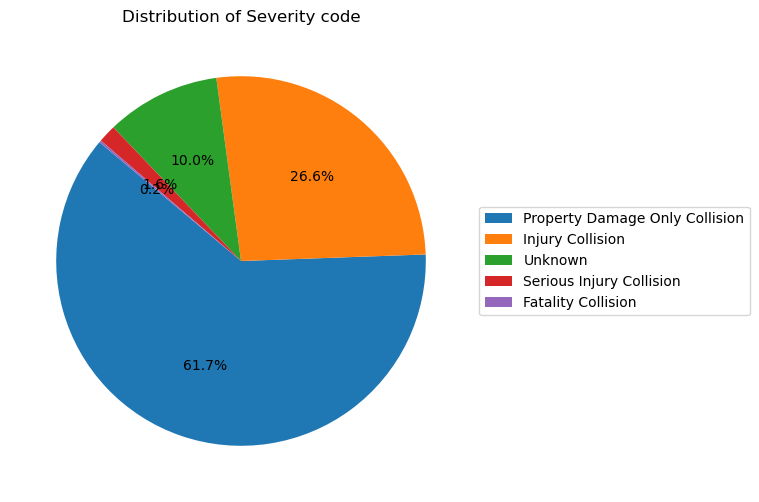

In [42]:
""" Univariative pie chart plots """
  # Get unique values and their counts
value_counts = df_cleaned["SEVERITYDESC"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=None, autopct='%1.1f%%', startangle=140) 
plt.title("Distribution of Severity code")
plt.legend(value_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

The majority of collisions result in property damage only, followed by collisions resulting in injury, with a smaller number of collisions leading to fatalities.

In [43]:
# univariate anlysis on HITPARKEDCAR column
df_cleaned["HITPARKEDCAR"].value_counts().sum()

248294

(array([2.56070e+04, 1.68860e+04, 1.34729e+05, 4.11630e+04, 1.67940e+04,
        7.49000e+03, 3.06200e+03, 1.30100e+03, 5.94000e+02, 2.55000e+02,
        1.42000e+02, 6.60000e+01, 3.60000e+01, 2.30000e+01, 0.00000e+00,
        2.50000e+01, 1.10000e+01, 8.00000e+00, 1.40000e+01, 6.00000e+00,
        6.00000e+00, 6.00000e+00, 2.00000e+00, 5.00000e+00, 3.00000e+00,
        3.00000e+00, 6.00000e+00, 5.00000e+00, 0.00000e+00, 3.00000e+00,
        3.00000e+00, 4.00000e+00, 2.00000e+00, 3.00000e+00, 3.00000e+00,
        0.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 6.00000e+00, 0.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

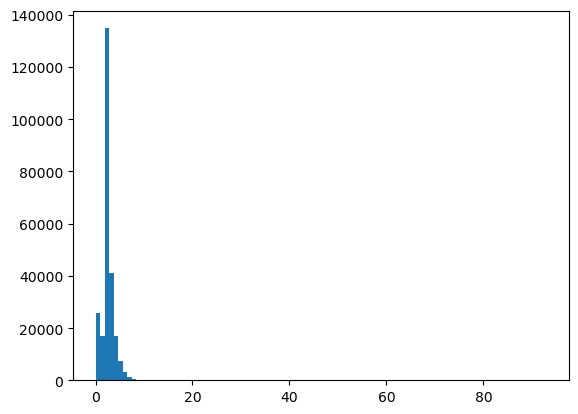

In [44]:
plt.hist(df_cleaned["PERSONCOUNT"], bins = 100)

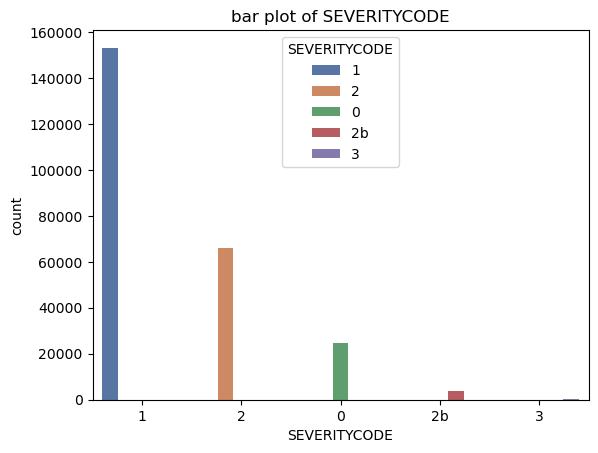

In [45]:
""" Univariative bar plots """
  # Filter the dataframe for specific column values with their respective counts
filter_df = df_cleaned["SEVERITYCODE"].value_counts().reset_index()

color_palette = sns.color_palette("deep", len(filter_df))

sns.barplot(data=filter_df, x=filter_df.columns[0], y=filter_df.columns[1], hue=filter_df.columns[0], palette = color_palette)
plt.title("bar plot of SEVERITYCODE")
plt.xticks(rotation=None)

plt.show()

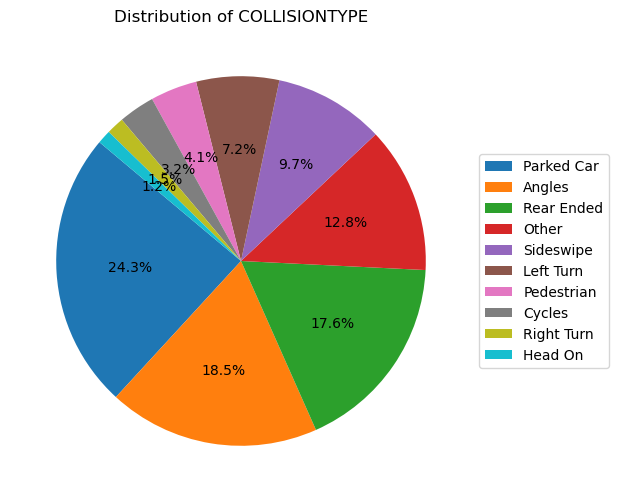

In [46]:
""" Univariative pie chart plots """
  # Get unique values and their counts
value_counts = df_cleaned["COLLISIONTYPE"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=None, autopct='%1.1f%%', startangle=140) 
plt.title("Distribution of COLLISIONTYPE")
plt.legend(value_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


The highest number of collisions happen with parked cars, at angles, and as rear-end incidents.

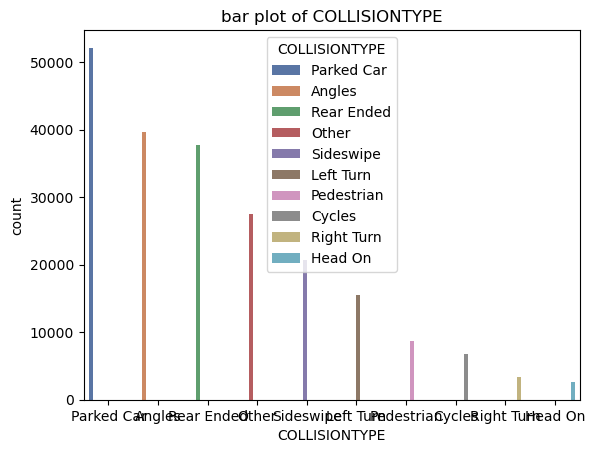

In [47]:
""" Univariative bar plots """
  # Filter the dataframe for specific column values with their respective counts
filter_df = df_cleaned["COLLISIONTYPE"].value_counts().reset_index()

color_palette = sns.color_palette("deep", len(filter_df))

sns.barplot(data=filter_df, x=filter_df.columns[0], y=filter_df.columns[1], hue=filter_df.columns[0], palette = color_palette)
plt.title("bar plot of COLLISIONTYPE")
plt.xticks(rotation=None)

plt.show()

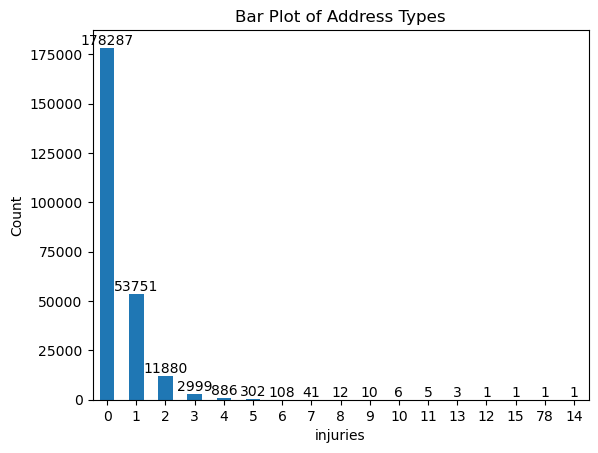

In [48]:
df_cleaned["INJURIES"].value_counts().plot(kind = "bar")
plt.xlabel('injuries')
plt.ylabel('Count')
plt.title('Bar Plot of Address Types')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
# Add index annotations
for i, value in enumerate(df_cleaned["INJURIES"].value_counts()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()


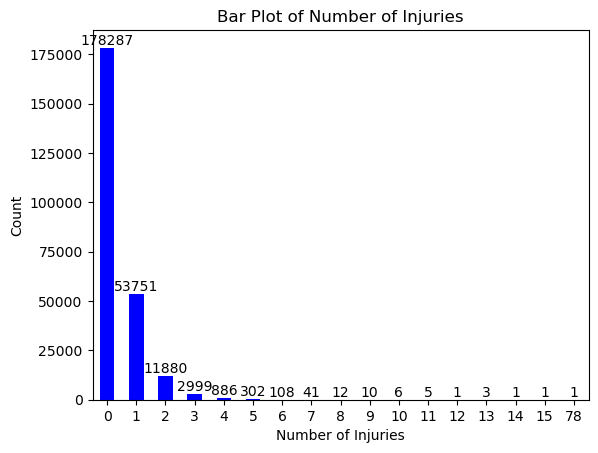

In [49]:
# Plot bar plot with annotations
df_cleaned["INJURIES"].value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Bar Plot of Number of Injuries')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal

# Add annotations
for i, value in enumerate(df_cleaned["INJURIES"].value_counts().sort_index()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

In [50]:
df_cleaned["SEVERITYCODE"].head()

0     2
1     1
2     2
3     2
4    2b
Name: SEVERITYCODE, dtype: object

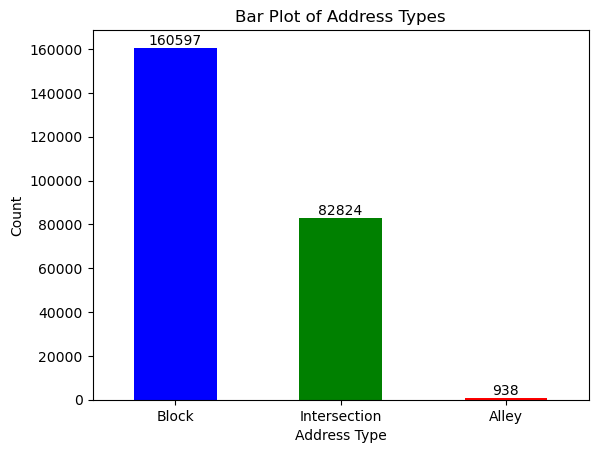

In [51]:
df_cleaned["ADDRTYPE"].value_counts().plot(kind = "bar", color=['blue', 'green', 'red'])
plt.xlabel('Address Type')
plt.ylabel('Count')
plt.title('Bar Plot of Address Types')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
# Add index annotations
for i, value in enumerate(df_cleaned["ADDRTYPE"].value_counts()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
plt.show()


The majority of accidents happen on blocks and at intersections.

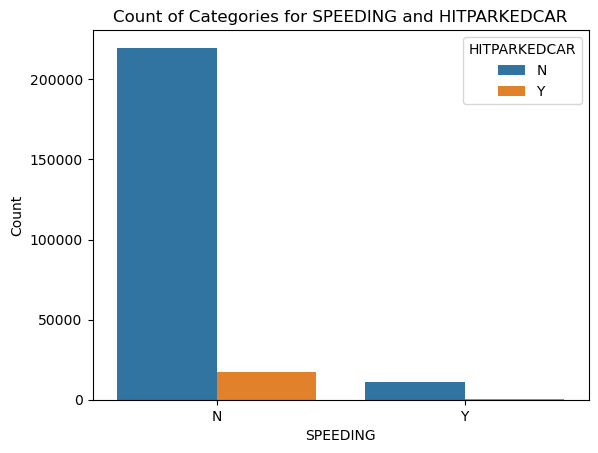

In [52]:
#Barplot of  'SPEEDING' and 'HITPARKEDCAR' are the names of the categorical variables
sns.countplot(x='SPEEDING', hue= 'HITPARKEDCAR', data=df_cleaned)
plt.xlabel('SPEEDING')
plt.ylabel('Count')
plt.title('Count of Categories for SPEEDING and HITPARKEDCAR')
plt.show()

It seems that chance of hiting parked car increases when the vehicle is speeding.

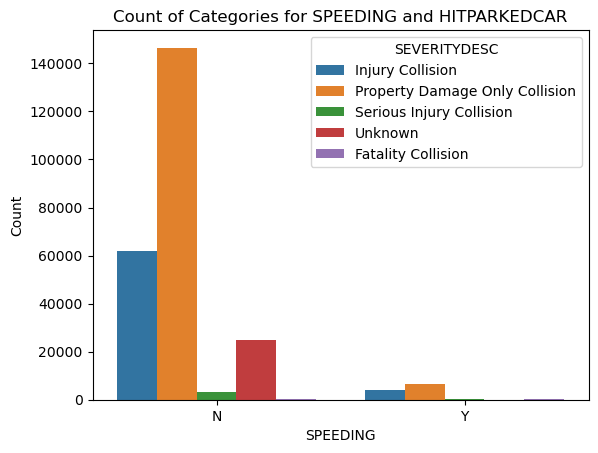

In [53]:
#Barplot of  'SPEEDING' and 'SEVERITYDESC' are the names of the categorical variables
sns.countplot(x='SPEEDING', hue= 'SEVERITYDESC', data=df_cleaned)
plt.xlabel('SPEEDING')
plt.ylabel('Count')
plt.title('Count of Categories for SPEEDING and HITPARKEDCAR')
plt.show()

It looks when cars are not speeding most of collision lead to injury and property damage only.

In [54]:
df_cleaned.columns

Index(['OBJECTID', 'COLDETKEY', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK',
       'REPORTLINK', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'x', 'y'],
      dtype='object')

In [55]:
df_cleaned["INCDTTM"]

0          1/31/2023 7:50:00 PM
1           5/7/2023 5:17:00 AM
2          4/17/2023 7:14:00 AM
3         10/2/2023 11:15:00 AM
4          10/4/2023 9:33:00 AM
                  ...          
248289                 1/3/2024
248290               10/13/2023
248291                1/22/2024
248292               11/13/2023
248293                12/1/2023
Name: INCDTTM, Length: 248294, dtype: object

df_cleaned.columns

In [56]:

df_cleaned["INCDATE"]

0          1/31/2023 12:00:00 AM
1           5/7/2023 12:00:00 AM
2          4/17/2023 12:00:00 AM
3          10/2/2023 12:00:00 AM
4          10/4/2023 12:00:00 AM
                   ...          
248289      1/3/2024 12:00:00 AM
248290    10/13/2023 12:00:00 AM
248291     1/22/2024 12:00:00 AM
248292    11/13/2023 12:00:00 AM
248293     12/1/2023 12:00:00 AM
Name: INCDATE, Length: 248294, dtype: object

In [57]:
# we just want to capture the data from the INCDATE column.

df_cleaned['INCDATE'] = pd.to_datetime(df_cleaned['INCDATE'], errors='coerce')
print(df_cleaned['INCDATE'].dtype)
df_cleaned['INCDATE']

datetime64[ns]


/var/folders/nn/lc5n9zn964zcgsw9v2_vpjvw0000gn/T/ipykernel_11264/922285284.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['INCDATE'] = pd.to_datetime(df_cleaned['INCDATE'], errors='coerce')


0        2023-01-31
1        2023-05-07
2        2023-04-17
3        2023-10-02
4        2023-10-04
            ...    
248289   2024-01-03
248290   2023-10-13
248291   2024-01-22
248292   2023-11-13
248293   2023-12-01
Name: INCDATE, Length: 248294, dtype: datetime64[ns]

In [58]:
''' we want to perform differnent univariate analysis on different months
    so we capture the date value from INCDATE column.
'''
df_cleaned["MONTH"] = df_cleaned["INCDATE"].dt.month
df_cleaned["MONTH"]

0          1
1          5
2          4
3         10
4         10
          ..
248289     1
248290    10
248291     1
248292    11
248293    12
Name: MONTH, Length: 248294, dtype: int32

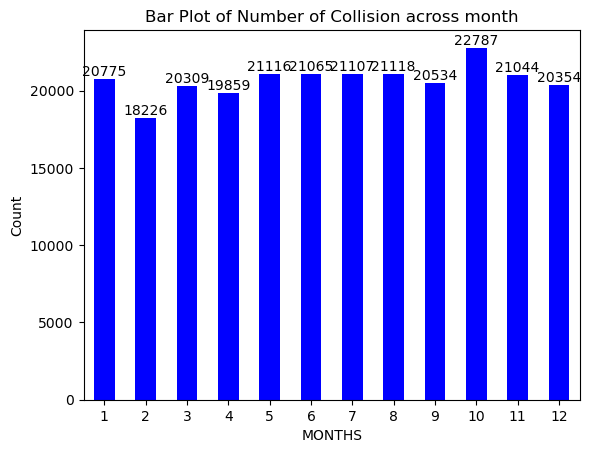

In [59]:
# Plot bar plot with annotations
df_cleaned["MONTH"].value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('MONTHS')
plt.ylabel('Count')
plt.title('Bar Plot of Number of Collision across month')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal

# Add annotations
for i, value in enumerate(df_cleaned["MONTH"].value_counts().sort_index()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

The above bar plot show the number of collision count in more on the 10th  month (i.e, octobar)

In [60]:
# now we can also see collision across different years.
df_cleaned["YEARS"] = df_cleaned["INCDATE"].dt.year
df_cleaned["YEARS"]


0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
248289    2024
248290    2023
248291    2024
248292    2023
248293    2023
Name: YEARS, Length: 248294, dtype: int32

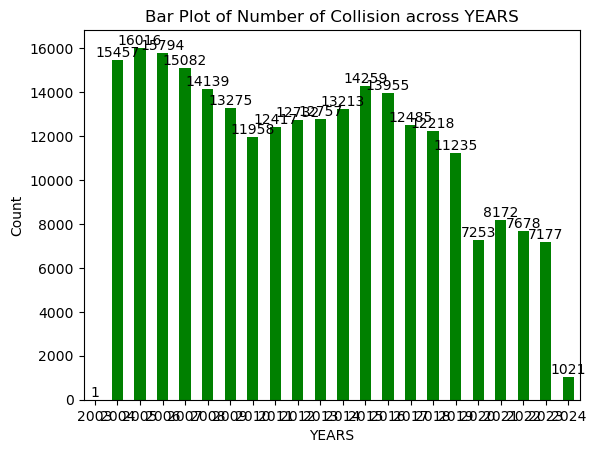

In [61]:
# Plot bar plot with annotations
df_cleaned["YEARS"].value_counts().sort_index().plot(kind='bar', color='green')
plt.xlabel('YEARS')
plt.ylabel('Count')
plt.title('Bar Plot of Number of Collision across YEARS')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal

# Add annotations
for i, value in enumerate(df_cleaned["YEARS"].value_counts().sort_index()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

# performing Baivariate analysis on severity code and COLLISIONTYPE columns AND severity description and collisiontype.

In [62]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cleaned['COLLISIONTYPE'], df_cleaned['SEVERITYDESC'])
print(cross_tab)

SEVERITYDESC   Fatality Collision  Injury Collision  \
COLLISIONTYPE                                         
Angles                         29             15448   
Cycles                         34              5447   
Head On                        24              1036   
Left Turn                      19              6033   
Other                         114              6837   
Parked Car                     11              3102   
Pedestrian                    185              6717   
Rear Ended                     13             16022   
Right Turn                      1               701   
Sideswipe                      11              2887   

SEVERITYDESC   Property Damage Only Collision  Serious Injury Collision  \
COLLISIONTYPE                                                             
Angles                                  23641                       553   
Cycles                                    787                       522   
Head On                                

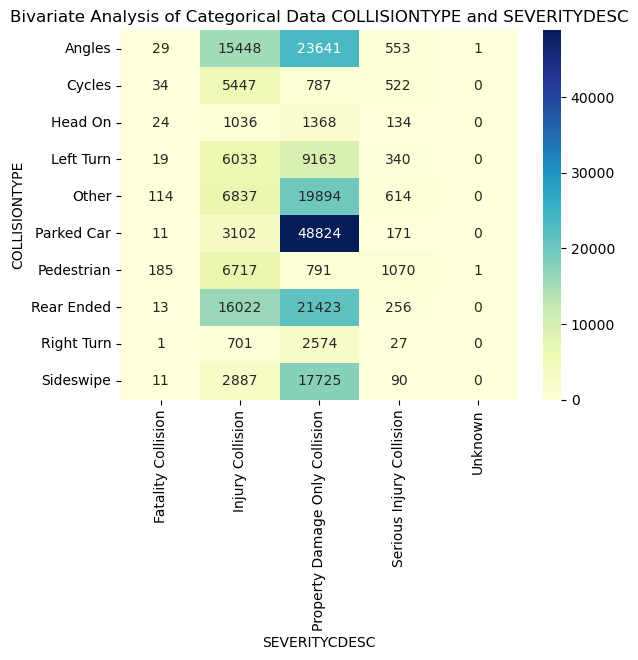

In [86]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cleaned['COLLISIONTYPE'], df_cleaned['SEVERITYDESC'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('SEVERITYCDESC')
plt.ylabel('COLLISIONTYPE')
plt.title('Bivariate Analysis of Categorical Data COLLISIONTYPE and SEVERITYDESC')
plt.show()

The above heatmap shows that the different collision types mostly lead 
to the property damage and injury only.

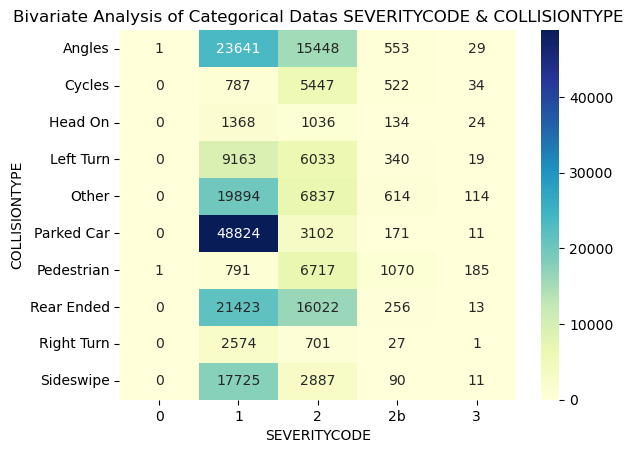

In [64]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cleaned['COLLISIONTYPE'], df_cleaned['SEVERITYCODE'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('SEVERITYCODE')
plt.ylabel('COLLISIONTYPE')
plt.title('Bivariate Analysis of Categorical Datas SEVERITYCODE & COLLISIONTYPE')
plt.show()


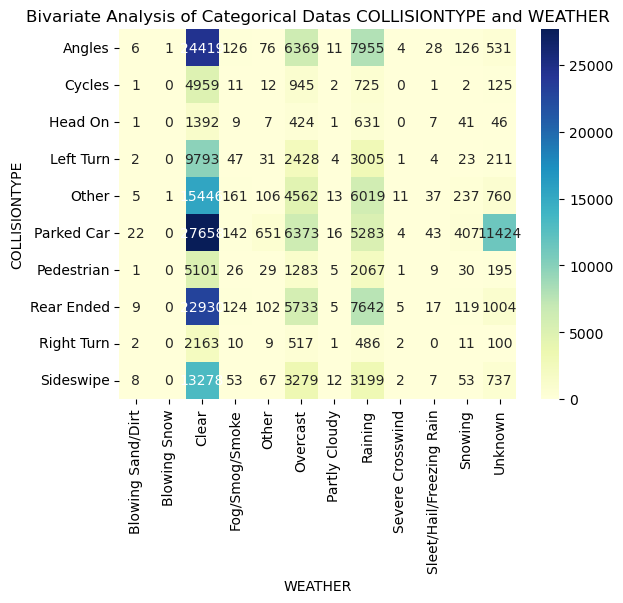

In [85]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cleaned['COLLISIONTYPE'], df_cleaned['WEATHER'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('WEATHER')
plt.ylabel('COLLISIONTYPE')
plt.title('Bivariate Analysis of Categorical Datas COLLISIONTYPE and WEATHER')
plt.show()


The heatmap reveals that the majority of collisions occur during clear weather conditions, with overcast conditions and rainfall following closely behind.

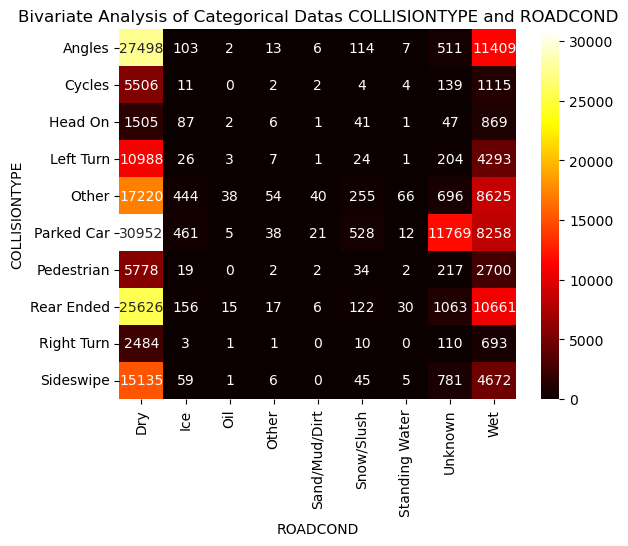

In [84]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cleaned['COLLISIONTYPE'], df_cleaned['ROADCOND'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, cmap='hot', fmt='d')
plt.xlabel('ROADCOND')
plt.ylabel('COLLISIONTYPE')
plt.title('Bivariate Analysis of Categorical Datas COLLISIONTYPE and ROADCOND')
plt.show()

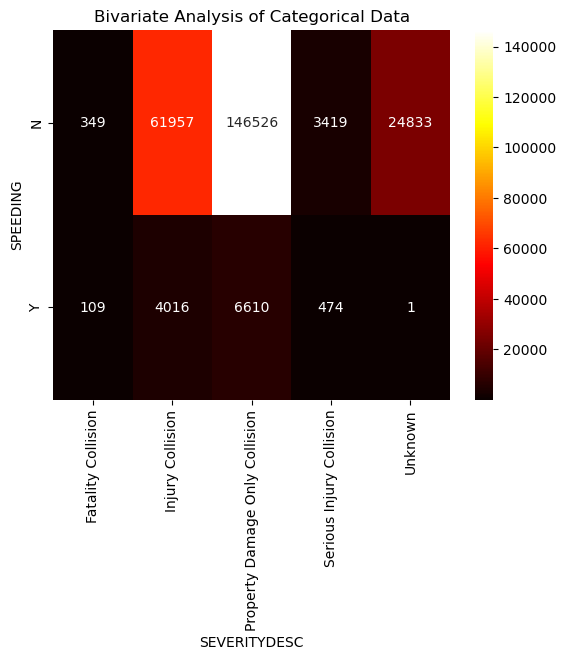

In [67]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cleaned['SPEEDING'], df_cleaned['SEVERITYDESC'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, cmap='hot', fmt='d')
plt.xlabel('SEVERITYDESC')
plt.ylabel('SPEEDING')
plt.title('Bivariate Analysis of Categorical Data')
plt.show()

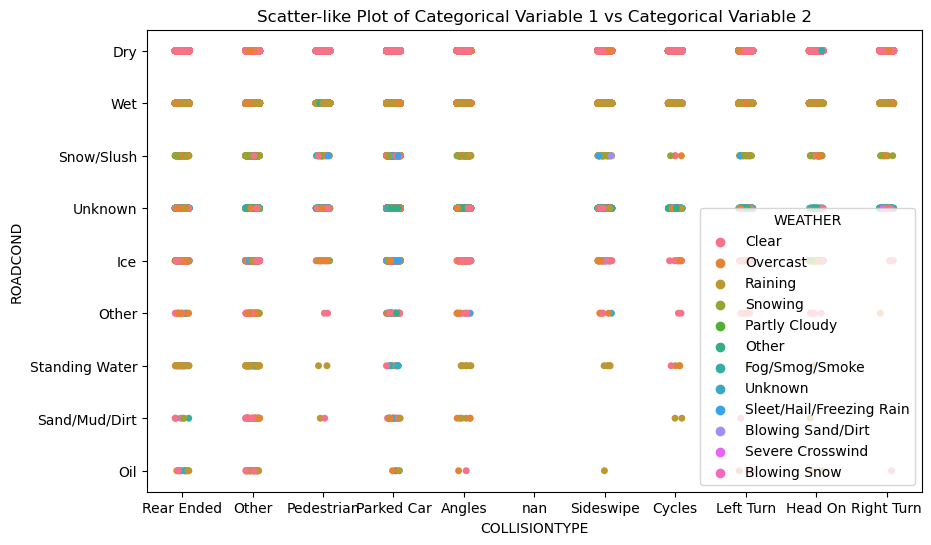

In [68]:
# Create the scatter-like plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.stripplot(x='COLLISIONTYPE', y='ROADCOND', data=df_cleaned, jitter=True, hue= df_cleaned['WEATHER'])
plt.xlabel('COLLISIONTYPE')
plt.ylabel('ROADCOND')
plt.title('Scatter-like Plot of Categorical Variable 1 vs Categorical Variable 2')
plt.show()

chisquare test()
if pvalue < 0.05 then accept alternate hypotheses
if pvalue >0.05 then accept null hypothesis
before doing this we need to make contengency table

Null Hypothesis (H0): There is no significant association between weather conditions and collision severity.

Alternative Hypothesis (H1): There is a significant association between weather conditions and collision severity.


In [69]:
sev_whe_df = pd.crosstab(df_cleaned["SEVERITYDESC"],df_cleaned["WEATHER"] )
print(sev_whe_df)

WEATHER                         Blowing Sand/Dirt  Blowing Snow  Clear  \
SEVERITYDESC                                                             
Fatality Collision                              0             0    283   
Injury Collision                               15             1  40483   
Property Damage Only Collision                 42             0  83886   
Serious Injury Collision                        0             1   2491   
Unknown                                         0             0      1   

WEATHER                         Fog/Smog/Smoke  Other  Overcast  \
SEVERITYDESC                                                      
Fatality Collision                           4      3        75   
Injury Collision                           227    144      9899   
Property Damage Only Collision             472    934     21377   
Serious Injury Collision                     6      9       567   
Unknown                                      0      0         1   

WEATHER    

In [70]:
from scipy.stats import chi2_contingency

In [71]:
chi2, p, dof, expected = chi2_contingency(sev_whe_df)
print(dof)
print(p)

44
0.0


Since the p value is high i.e, ( < 0.05  ) so we accept the Alternate hypothesis. so there seems to be some association between the whether condition and severity of the accident.

In [72]:
sev_sevtyp_df = pd.crosstab(df_cleaned["SEVERITYDESC"],df_cleaned["COLLISIONTYPE"] )
print(sev_sevtyp_df)

COLLISIONTYPE                   Angles  Cycles  Head On  Left Turn  Other  \
SEVERITYDESC                                                                
Fatality Collision                  29      34       24         19    114   
Injury Collision                 15448    5447     1036       6033   6837   
Property Damage Only Collision   23641     787     1368       9163  19894   
Serious Injury Collision           553     522      134        340    614   
Unknown                              1       0        0          0      0   

COLLISIONTYPE                   Parked Car  Pedestrian  Rear Ended  \
SEVERITYDESC                                                         
Fatality Collision                      11         185          13   
Injury Collision                      3102        6717       16022   
Property Damage Only Collision       48824         791       21423   
Serious Injury Collision               171        1070         256   
Unknown                                 

In [73]:
chi2, p, dof, expected = chi2_contingency(sev_sevtyp_df)
print(dof)
print(p)

36
0.0


since the pvalue is very small so we can conclude that there is a significant association between collision types and severity levels. 

In [74]:
sev_roadcon_df = pd.crosstab(df_cleaned["SEVERITYDESC"],df_cleaned["ROADCOND"] )
print(sev_roadcon_df)

ROADCOND                          Dry   Ice  Oil  Other  Sand/Mud/Dirt  \
SEVERITYDESC                                                             
Fatality Collision                342     1    0      0              0   
Injury Collision                45374   299   26     44             25   
Property Damage Only Collision  94213  1049   41     98             54   
Serious Injury Collision         2767    21    0      4              0   
Unknown                             0     0    0      0              0   

ROADCOND                        Snow/Slush  Standing Water  Unknown    Wet  
SEVERITYDESC                                                                
Fatality Collision                       0               0        1     95  
Injury Collision                       195              31      798  17411  
Property Damage Only Collision         969              94    14707  34866  
Serious Injury Collision                13               3       35    931  
Unknown            

In [75]:
chi2, p, dof, expected = chi2_contingency(sev_roadcon_df)
print(dof)
print(p)

32
0.0


since the pvalue is very small so we can conclude that there is a significant association between SEVERITYDESC and ROADCOND.

In [76]:
df_cleaned['SEVERITYDESC'].value_counts()

SEVERITYDESC
Property Damage Only Collision    153136
Injury Collision                   65973
Unknown                            24834
Serious Injury Collision            3893
Fatality Collision                   458
Name: count, dtype: int64

In [77]:
sev_speeding_df = pd.crosstab(df_cleaned["SEVERITYDESC"],df_cleaned["SPEEDING"] )
print(sev_speeding_df)

SPEEDING                             N     Y
SEVERITYDESC                                
Fatality Collision                 349   109
Injury Collision                 61957  4016
Property Damage Only Collision  146526  6610
Serious Injury Collision          3419   474
Unknown                          24833     1


In [78]:
chi2, p, dof, expected = chi2_contingency(sev_speeding_df)
print(dof)
print(p)

4
0.0


since the pvalue is very small so we can conclude that there is a significant association between SEVERITYDESC and SPEEDING.

In [79]:
missing_values = df_cleaned.isnull()

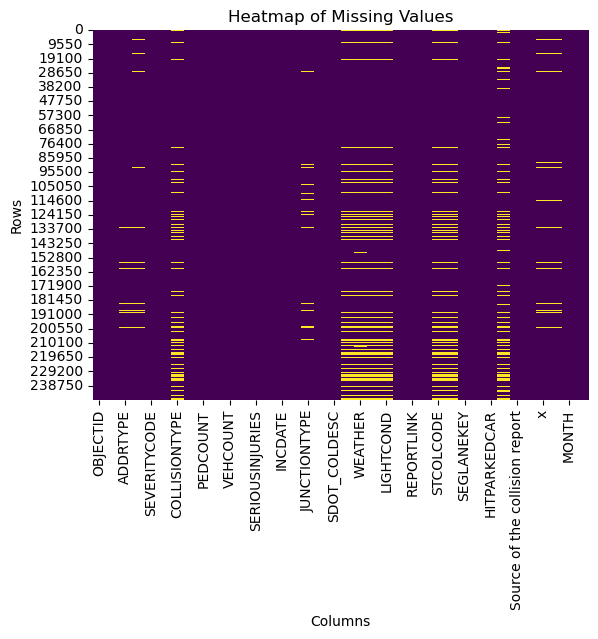

In [80]:
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


# Chi-square Test & Normality Hypothesis Tests

In [81]:


def chisquare_test(df, df_column, alpha = 0.05):
  
  # Performs Chi-squared test on a given data sample.
  
  cross_tab = pd.crosstab(df[df_column], df['SEVERITYCODE'])
  chi2_stat, pvalue, dof, expected = chi2_contingency(cross_tab)

  if pvalue <= alpha:
    print(f"There is a statistically significant relationship between {df_column} & SEVERITYCODE")
  else:
    print(f"There is no statistically significant relationship between {df_column} & SEVERITYCODE")
  return chi2_stat, pvalue, expected


def hypothesis_test(df_column, alpha = 0.05):
  """
  Performs normality test on a given data sample.
  """
  n_samples = df_column.value_counts().sum()
  if n_samples < 100:
    statistics, pvalue = shapiro(df_column)
  else:
    statistics, pvalue = kstest(df_column, 'norm')

  if pvalue <= alpha:
    print("Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1")
  else:
    print("Sample looks Gaussian(normal) distribution | Accept H0")
  return pvalue, statistics

In [82]:

filtered_chi_squared_columns = ['ADDRTYPE', 'COLLISIONTYPE', 'UNDERINFL','WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
'MONTH', 'YEARS']

for filter in filtered_chi_squared_columns:
  print(f"Chi-square test result for {filter}:")
  # Execute Chi-squared test
  chi2_stat, pvalue, expected = chisquare_test(df_cleaned, filter)
  print(f"Chi-square statistics: {chi2_stat:.4f}")
  print(f"P-value: {pvalue}\n")

Chi-square test result for ADDRTYPE:
There is a statistically significant relationship between ADDRTYPE & SEVERITYCODE
Chi-square statistics: 10288.7034
P-value: 0.0

Chi-square test result for COLLISIONTYPE:
There is a statistically significant relationship between COLLISIONTYPE & SEVERITYCODE
Chi-square statistics: 52986.7596
P-value: 0.0

Chi-square test result for UNDERINFL:
There is a statistically significant relationship between UNDERINFL & SEVERITYCODE
Chi-square statistics: 1272.0379
P-value: 5.273235409998992e-265

Chi-square test result for WEATHER:
There is a statistically significant relationship between WEATHER & SEVERITYCODE
Chi-square statistics: 5679.1027
P-value: 0.0

Chi-square test result for ROADCOND:
There is a statistically significant relationship between ROADCOND & SEVERITYCODE
Chi-square statistics: 5690.8899
P-value: 0.0

Chi-square test result for LIGHTCOND:
There is a statistically significant relationship between LIGHTCOND & SEVERITYCODE
Chi-square statist

# Pearson Correlation Tests

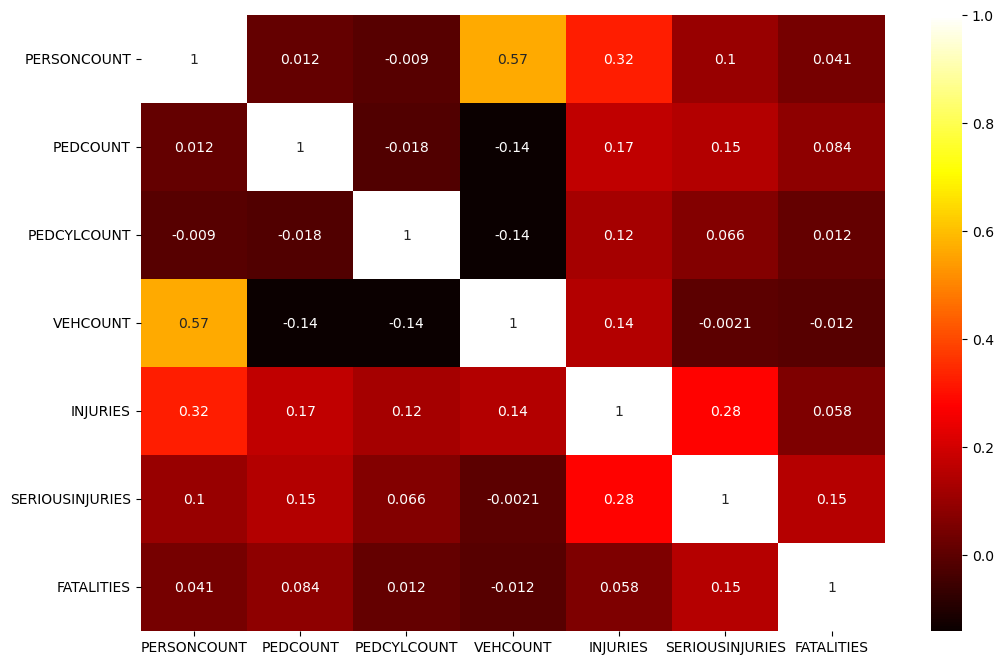

In [83]:

columns_of_interest=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES']

plt.figure(figsize = (12, 8))
sns.heatmap(df[columns_of_interest].corr(), cmap = 'hot', annot = True)
plt.show()

From the above heatmap following insight can be drawn:

1. As the number of person increases then the number of vehicle count also is more.

2. As the number of people increses then the injury case more.

3. Serious injuries lead fatalities.

4. As the number of veichel increases then number of Pedestrian     decreases.



# Summary


1. After analyzing the data, it appears that the primary factors influencing the prediction of accident severity are likely to be the type of collision, junction type, number of people involved,COLLISIONTYPE, JUNCTIONTYPE, PERSONCOUNT, WEATHER, ROADCOND, LIGHTCOND, INATTENTIONIND, UNDERINFL, SPEEDING.

2. The analysis suggests that there is limited correlation between weather conditions and the severity of accidents.

3. The above bar plot show the number of collision count in more on the 10th  month (i.e, octobar).

4. The highest number of collisions happen with parked cars, at angles, and as rear-end incidents.

5. The majority of collisions result in property damage only, followed by collisions resulting in injury, with a smaller number of collisions leading to fatalities.

6. The data reveals that the majority of collisions occur during clear weather conditions, with overcast conditions and rainfall following behind.
